In [1]:
# Question: Multivariate Outlier Detection Using Mahalanobis Distance
# Description: Implement Mahalanobis distance to detect multivariate outliers in a dataset.



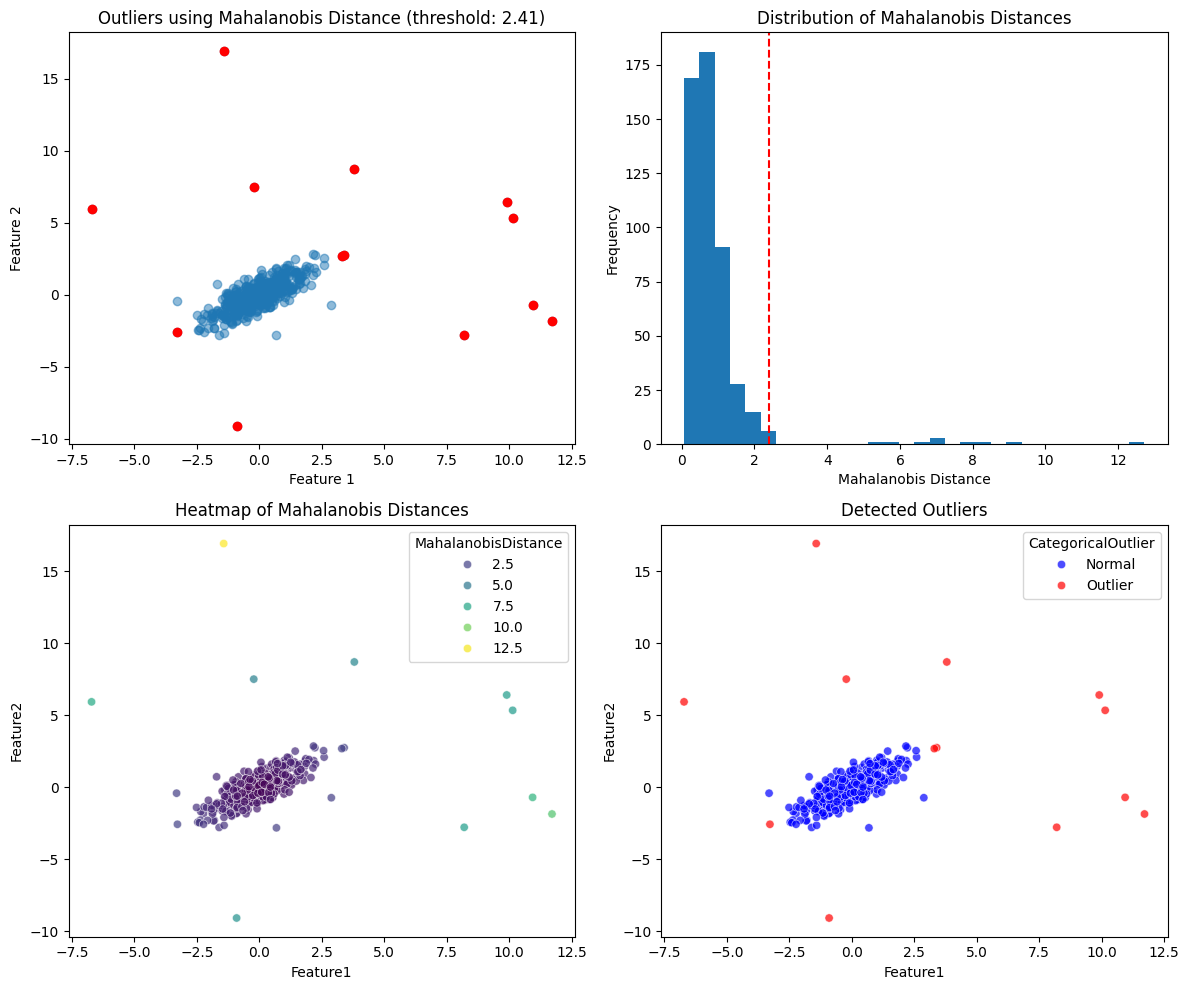

Detected 13 outliers out of 500 samples (2.60%)

Top 10 points with highest Mahalanobis distance:
      Feature1   Feature2  MahalanobisDistance  IsOutlier
222  -1.422738  16.919543            12.723535       True
389  11.717136  -1.853305             9.205651       True
359  10.941739  -0.699328             8.243423       True
358  -6.712001   5.931388             7.698308       True
450   8.202872  -2.775616             7.040008       True
122   9.905556   6.408337             6.988509       True
458  10.143712   5.343506             6.969135       True
8    -0.905651  -9.073081             6.421209       True
304   3.804686   8.700466             5.841160       True
316  -0.219224   7.507732             5.500571       True


In [2]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import mahalanobis
from numpy.linalg import inv
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
def detect_outliers_mahalanobis(X, threshold_percent=95):
    mean_vector = np.mean(X, axis=0)
    cov_matrix = np.cov(X, rowvar=False)
    inv_cov_matrix = inv(cov_matrix)
    mahal_dist = []
    for i in range(X.shape[0]):
        mahal_dist.append(mahalanobis(X[i], mean_vector, inv_cov_matrix))
    mahal_dist = np.array(mahal_dist)
    threshold = np.percentile(mahal_dist, threshold_percent)
    outliers = np.where(mahal_dist > threshold)[0]
    return mahal_dist, threshold, outliers
np.random.seed(42)
n_samples = 500
n_features = 2
mean = [0, 0]
cov = [[1, 0.8], [0.8, 1]]
X = np.random.multivariate_normal(mean, cov, n_samples)
outliers_idx = np.random.randint(0, n_samples, 15)
X[outliers_idx] = X[outliers_idx] + np.random.normal(0, 5, (15, n_features))
mahal_dist, threshold, outliers = detect_outliers_mahalanobis(X, threshold_percent=97.5)
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.scatter(X[outliers, 0], X[outliers, 1], color='red')
plt.title(f'Outliers using Mahalanobis Distance (threshold: {threshold:.2f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.subplot(2, 2, 2)
plt.hist(mahal_dist, bins=30)
plt.axvline(x=threshold, color='r', linestyle='--')
plt.title('Distribution of Mahalanobis Distances')
plt.xlabel('Mahalanobis Distance')
plt.ylabel('Frequency')
results = pd.DataFrame({
    'Feature1': X[:, 0],
    'Feature2': X[:, 1],
    'MahalanobisDistance': mahal_dist,
    'IsOutlier': np.isin(np.arange(n_samples), outliers)
})
plt.subplot(2, 2, 3)
sns.scatterplot(data=results, x='Feature1', y='Feature2', hue='MahalanobisDistance', 
                palette='viridis', alpha=0.7)
plt.title('Heatmap of Mahalanobis Distances')
plt.subplot(2, 2, 4)
df = results.copy()
df['CategoricalOutlier'] = np.where(df['IsOutlier'], 'Outlier', 'Normal')
sns.scatterplot(data=df, x='Feature1', y='Feature2', hue='CategoricalOutlier', 
                palette={'Outlier': 'red', 'Normal': 'blue'}, alpha=0.7)
plt.title('Detected Outliers')
plt.tight_layout()
plt.show()
print(f"Detected {len(outliers)} outliers out of {n_samples} samples ({len(outliers)/n_samples*100:.2f}%)")
print("\nTop 10 points with highest Mahalanobis distance:")
print(results.sort_values('MahalanobisDistance', ascending=False).head(10)[['Feature1', 'Feature2', 'MahalanobisDistance', 'IsOutlier']])